In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
#list af label associated to the colors
film_list = ["nausica", "laputa", "totoro", "lucciole", "kiki", "pioggia di ricordi", "porco rosso", "si sente il mare", "pom poko", "sospiri cuore", "mononoke", "yamada", "città incantata", "ricompensa gatto", "howl", "terramare", "ponyo", "arrietty", "collina papaveri", "si alza il vento", "principessa splendente", "marnie"]
print(len(film_list))

22


In [3]:
#hsl
#col_list = [(198, 100, 44), (219, 42, 46), (45, 99, 49), (0, 0, 1), (65, 61, 63), (356, 76, 67), (145, 100, 28), (226, 40, 82), (32, 99, 47), (50, 95, 51), (4, 56, 47), (154, 33, 69), (149, 16, 61), (202, 33, 50), (19, 73, 76), (60, 92, 43), (189, 76, 36), (85, 45, 48), (0, 68, 82), (218, 65, 35), (0, 0, 100), (229, 47, 19)]

#rgb
col_list = [(12, 154, 220), (75, 104, 156), (247, 187, 11), (3, 3, 3), (209, 216, 109), (232, 109, 116), (9, 144, 59), (191, 198, 226), (236, 125, 6), (249, 211, 10), (187, 63, 53), (149, 202, 179), (140, 171, 155), (85, 138, 168), (238, 177, 148), (212, 212, 9), (22, 139, 161), (132, 178, 68), (240, 176, 176), (31, 74, 147), (255, 255, 255), (93, 188, 210)]
col_list = [(c[0]/255, c[1]/255, c[2]/255) for c in col_list]

print(len(col_list))

22


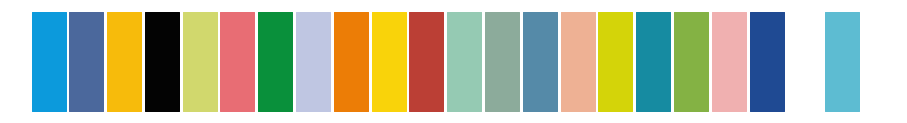

In [4]:
#from colorsys import hls_to_rgb

plt.figure(figsize=(16,2))
plt.axis('off')

for i in range(len(col_list)):
    clr = col_list[i]
    #clr = hls_to_rgb(col_list[i][0]/360, col_list[i][2]/100, col_list[i][1]/100)
    
    plt.scatter([i], [5.5], c=clr, s=1200, marker="s", label=film_list[i])
    plt.scatter([i], [5.0], c=clr, s=1200, marker="s")
    plt.scatter([i], [4.5], c=clr, s=1200, marker="s")
#plt.legend()

In [6]:
from skimage import io, color
from skimage import data

rgb_list = np.array(col_list)
rgb_list = np.expand_dims(rgb_list, axis=0)

lab_list = color.rgb2lab(rgb_list)[0]

In [9]:
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie1976
from colormath.color_diff import delta_e_cie2000

curr_color = 20
l = list(range(len(lab_list)))
sorted_color=[]

while (len(l)!=1):
    l.remove(curr_color)
    sorted_color.append(curr_color)
    
    color1 = LabColor(lab_l=lab_list[curr_color][0],
                      lab_a=lab_list[curr_color][1],
                      lab_b=-lab_list[curr_color][2])
    dist = []
    for j in l:
        color2 = LabColor(lab_l=lab_list[j][0],
                          lab_a=lab_list[j][1],
                          lab_b=-lab_list[j][2])
        
        delta_e = delta_e_cie2000(color1, color2)
        dist.append(delta_e)
        
    min_pos = np.argmin(dist)
    curr_color = l[min_pos]
    
sorted_color.append(l[0])
print(sorted_color, len(sorted_color))

[20, 7, 0, 13, 16, 21, 12, 11, 17, 4, 15, 9, 2, 8, 14, 18, 5, 10, 3, 19, 1, 6] 22


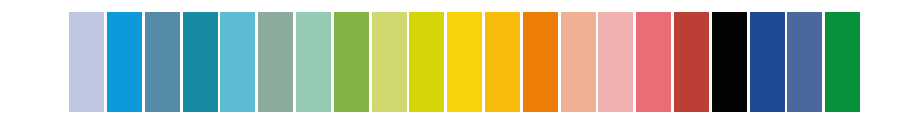

In [10]:
plt.figure(figsize=(16,2))
plt.axis('off')

for i in range(len(col_list)):
    clr = col_list[sorted_color[i]]
    
    plt.scatter([i], [5.5], c=clr, s=1200, marker="s", label=film_list[i])
    plt.scatter([i], [5.0], c=clr, s=1200, marker="s")
    plt.scatter([i], [4.5], c=clr, s=1200, marker="s")